In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diwali-sales-data/Diwali Sales Data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv("/kaggle/input/diwali-sales-data/Diwali Sales Data.csv",encoding= 'unicode_escape')
df.head()



,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


**Dropping the null rows**

In [7]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [8]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.shape

(11251, 13)

In [10]:
# Dropping the null values 
df.dropna(inplace=True)

In [11]:
df.shape

(11239, 13)

In [12]:
df['Amount']=df['Amount'].astype('int')

In [13]:
# The amount of data type float has been converted into int data type.
df['Amount'].dtypes

dtype('int64')

In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [15]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [16]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


**EXPLORATORY DATA ANALYSIS**

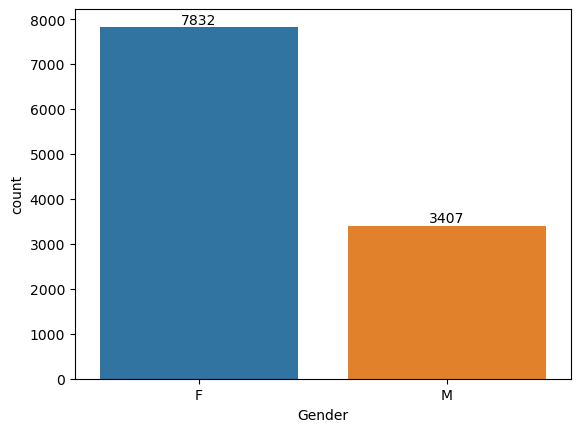

In [17]:
ax=sns.countplot(x="Gender",data=df)

for bars in ax.containers:
    ax.bar_label(bars)

In [18]:
df.groupby(["Gender"],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


/tmp/ipykernel_20/1279399485.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Gender").sum()["Amount"].plot(kind="pie",autopct="%.2f")


<Axes: ylabel='Amount'>

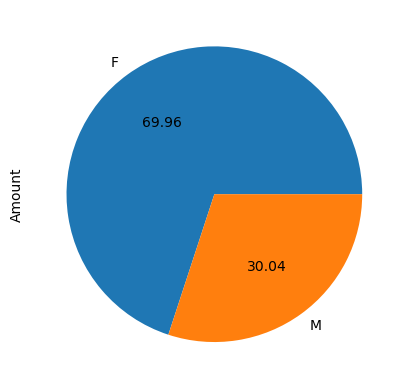

In [19]:
df.groupby("Gender").sum()["Amount"].plot(kind="pie",autopct="%.2f")

**FROM ABOVE GRAPH WE CAN SEE THAT MOST OF THE BUYERS ARE FEMALE AND EVEN THE PURCHASING POWER OF FEMALES ARE GREATER THEN MEN**

**AGE**

In [20]:
df['Age'].nunique()

81

In [21]:
df['Age'].unique()

array([28, 35, 16, 25, 26, 34, 20, 24, 29, 54, 19, 46, 30, 53, 83, 33, 40,
       39, 32, 36, 55, 27, 72, 45, 43, 47, 22, 52, 18, 21, 38, 37, 23, 49,
       42, 50, 48, 31, 44, 41, 66, 15, 51, 77, 87, 79, 71, 88, 58, 82, 62,
       92, 12, 63, 17, 13, 67, 90, 56, 75, 81, 64, 73, 84, 14, 76, 86, 89,
       68, 61, 91, 85, 70, 80, 65, 74, 69, 78, 57, 60, 59])

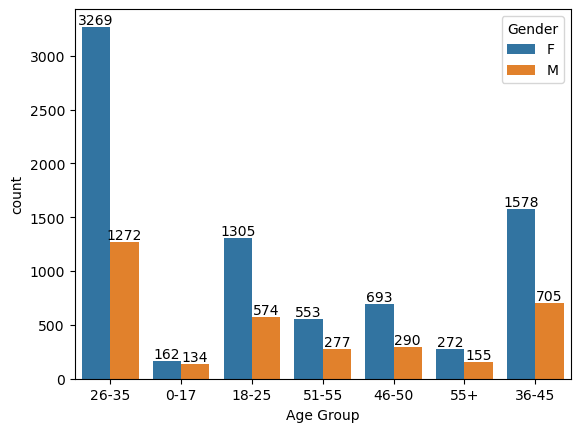

In [22]:
ax=sns.countplot(data=df,x='Age Group',hue="Gender")
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend=True

<Axes: xlabel='Age Group', ylabel='Amount'>

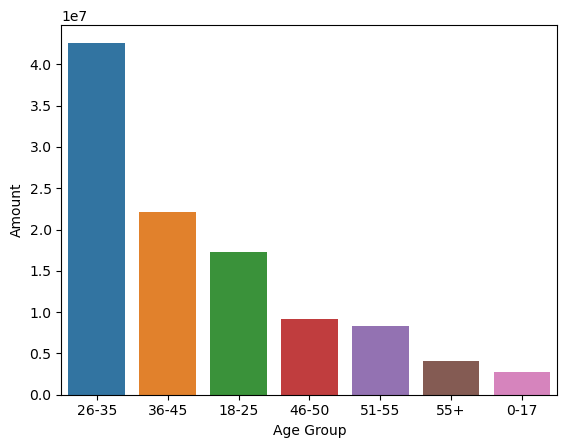

In [23]:
sales_age=df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending =False)
sns.barplot(x='Age Group',y='Amount',data=sales_age)

**from above graph we can see that most of the buyers are of age group 26-35 yrs female**

**State**

<Axes: xlabel='State', ylabel='Amount'>

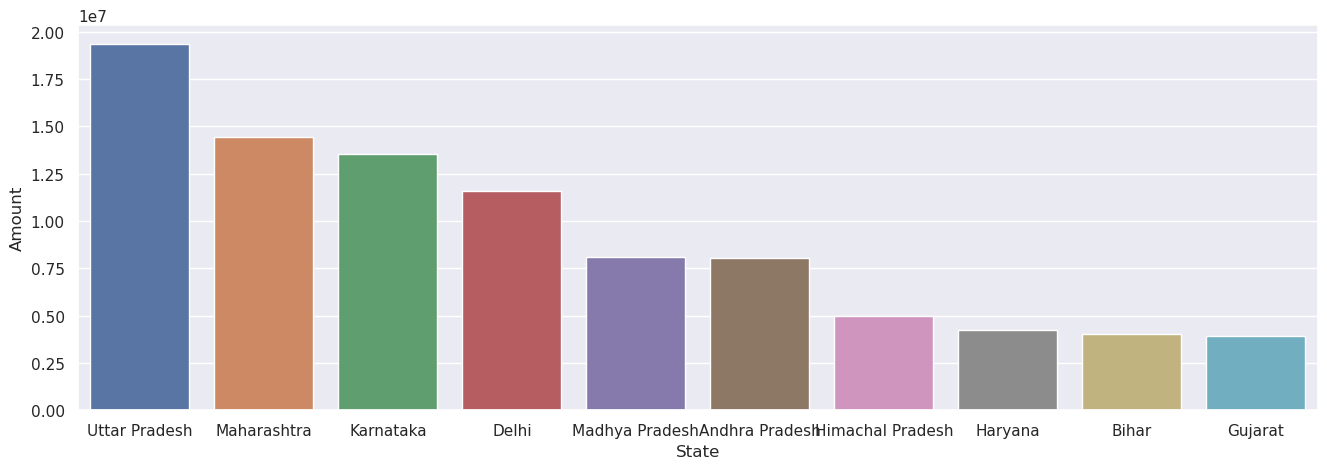

In [24]:
#Total Amount/Sales from top 10 states
sales_state=df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending =False).head(10)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(x='State',y='Amount',data=sales_state)

<Axes: xlabel='State', ylabel='Orders'>

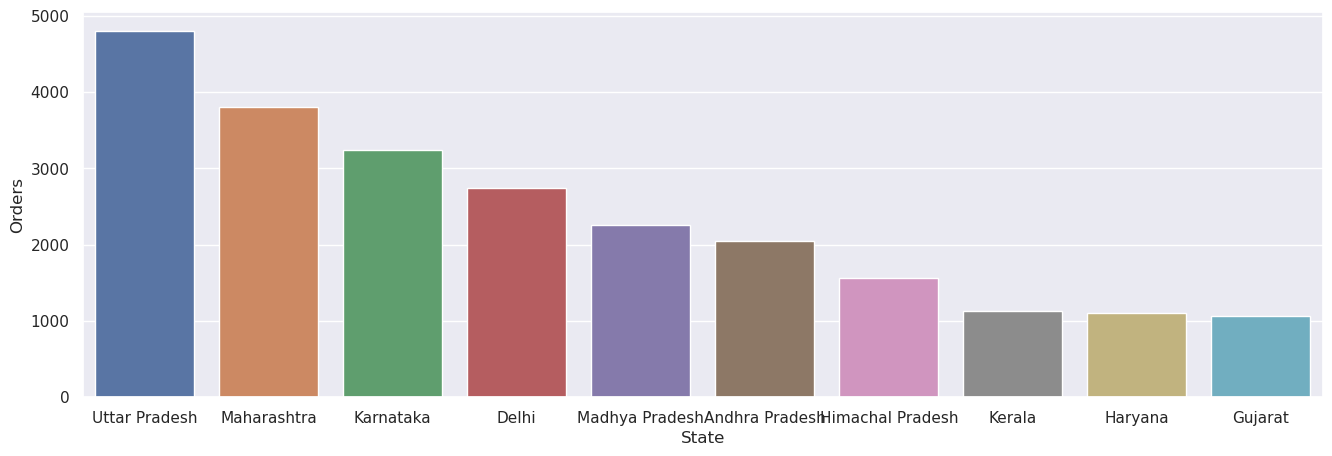

In [25]:
#Total number of orders from top 10 states
sales_state=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending =False).head(10)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(x='State',y='Orders',data=sales_state)

**From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh,Maharashtra and Karnataka respectively**

In [26]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: >

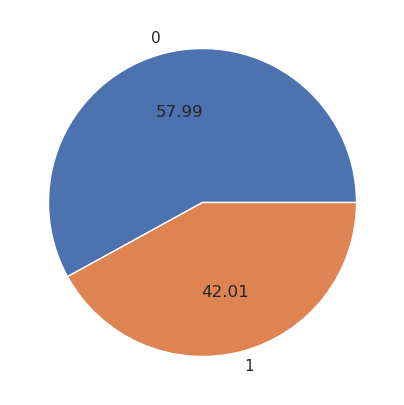

In [27]:
df.groupby("Marital_Status").size().plot(kind='pie',autopct='%0.2f')

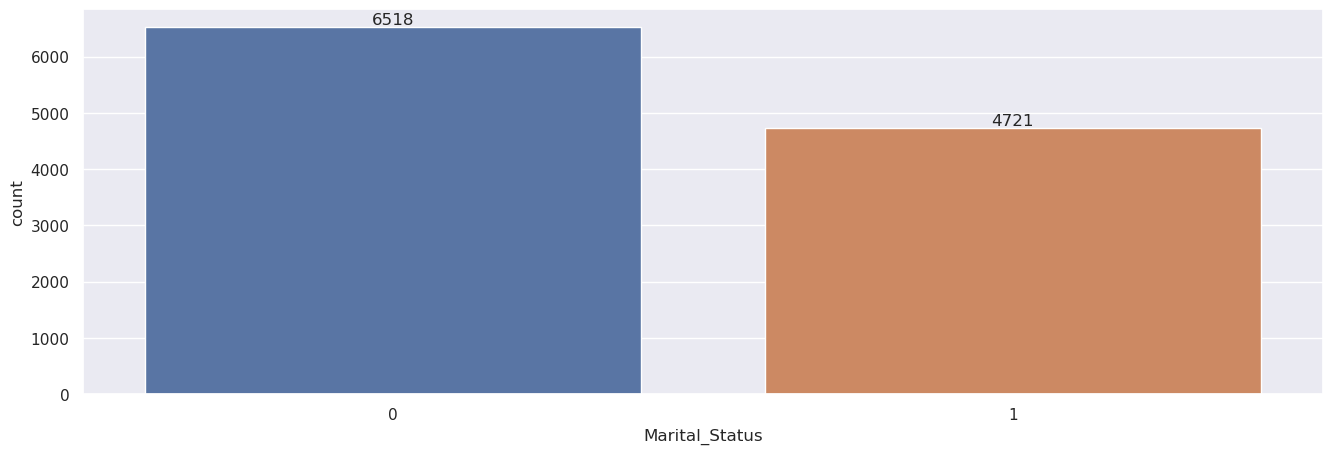

In [28]:
ax=sns.countplot(data=df,x='Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend=True

<Axes: xlabel='Marital_Status', ylabel='Amount'>

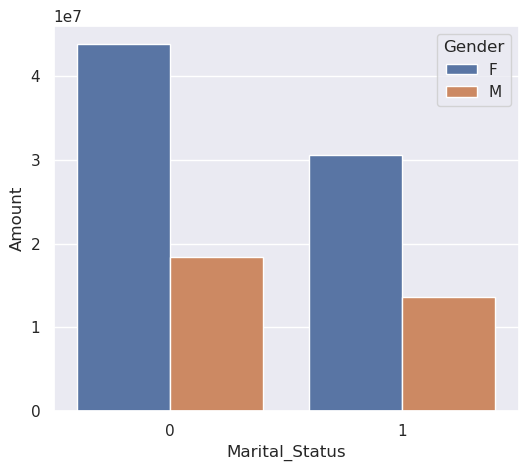

In [29]:
#Total Amount/Sales from top 10 states
sales_marital=df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending =False).head(10)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(x='Marital_Status',y='Amount',hue='Gender',data=sales_marital)

**From above graph we can see that most of the buyers are married(women) and they have high purchasing power**

**OCCUPATION**

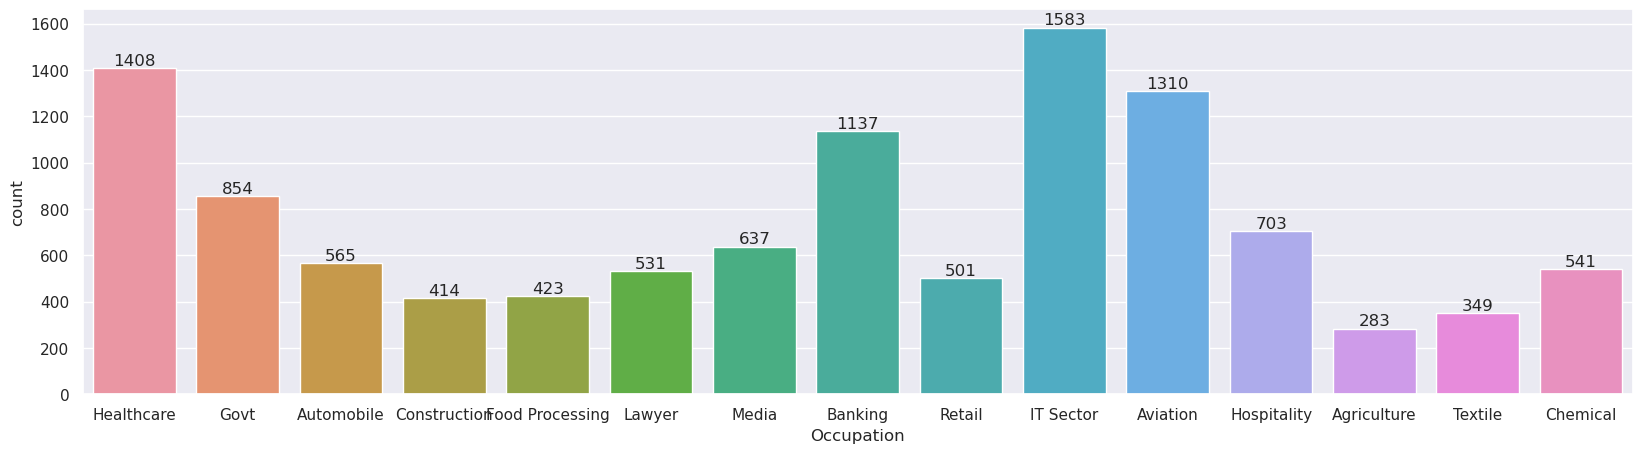

In [30]:
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(data=df,x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend=True


<Axes: xlabel='Occupation', ylabel='Amount'>

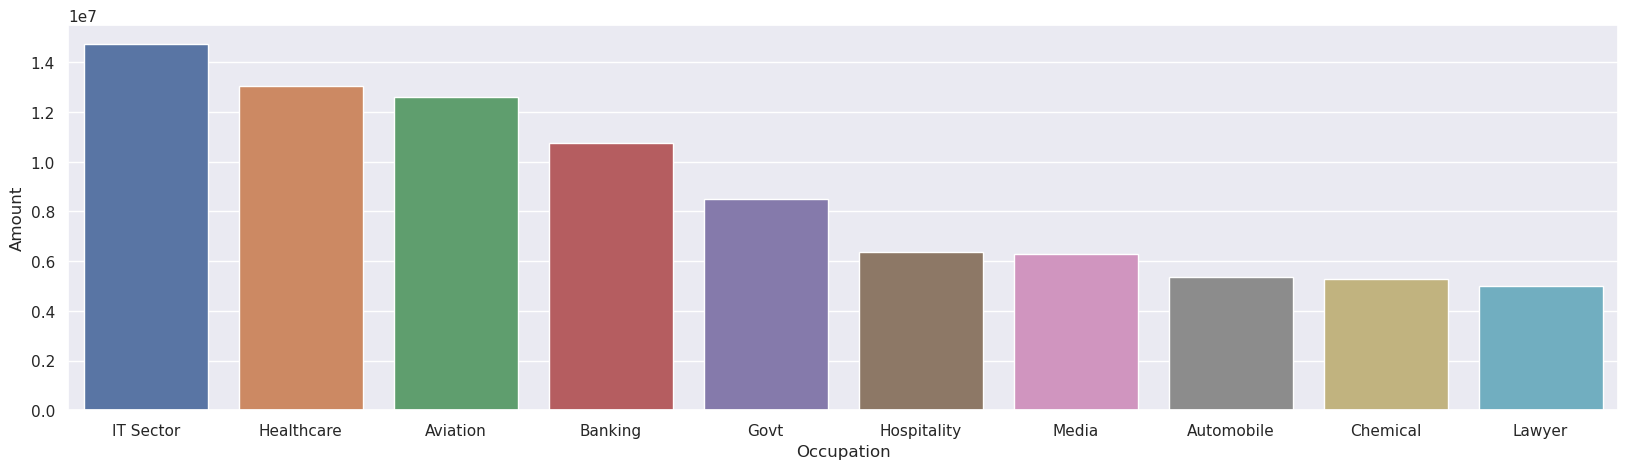

In [31]:
sales_occupation=df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending =False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Occupation',y='Amount',data=sales_occupation)

**From aboveGraph we can see that most of the buyers are working in IT,Healthcare and Aviation Sector**

**PRODUCT CATEGORY**

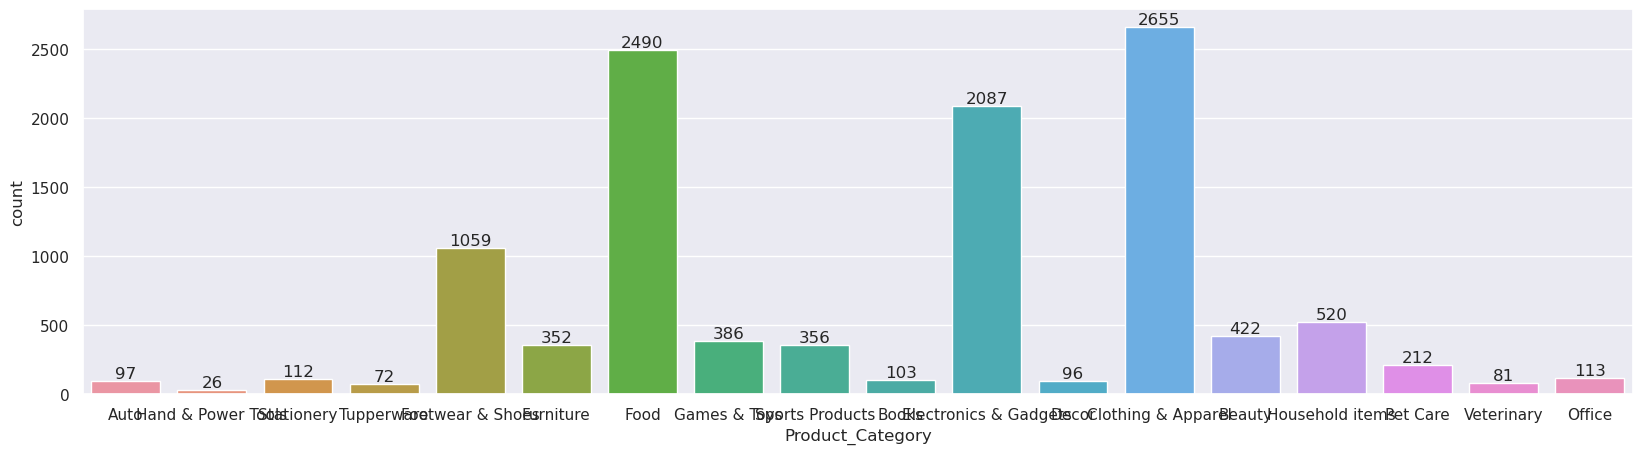

In [32]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

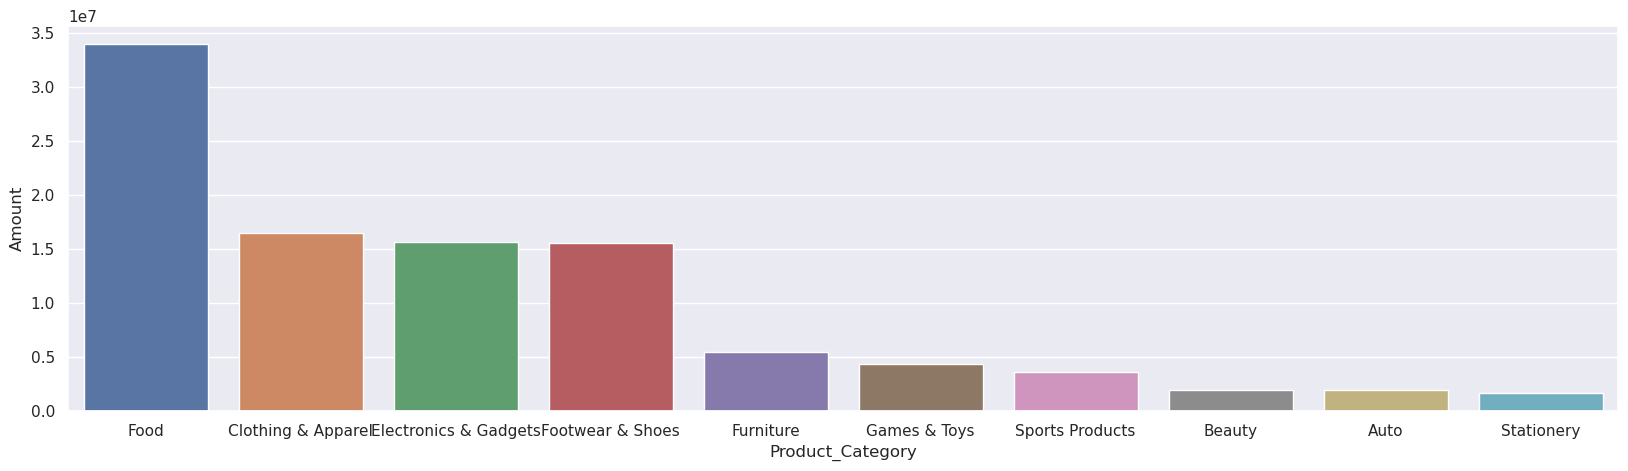

In [33]:
sales_product = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_product, x = 'Product_Category',y= 'Amount')

**From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category**

<Axes: xlabel='Product_ID', ylabel='Orders'>

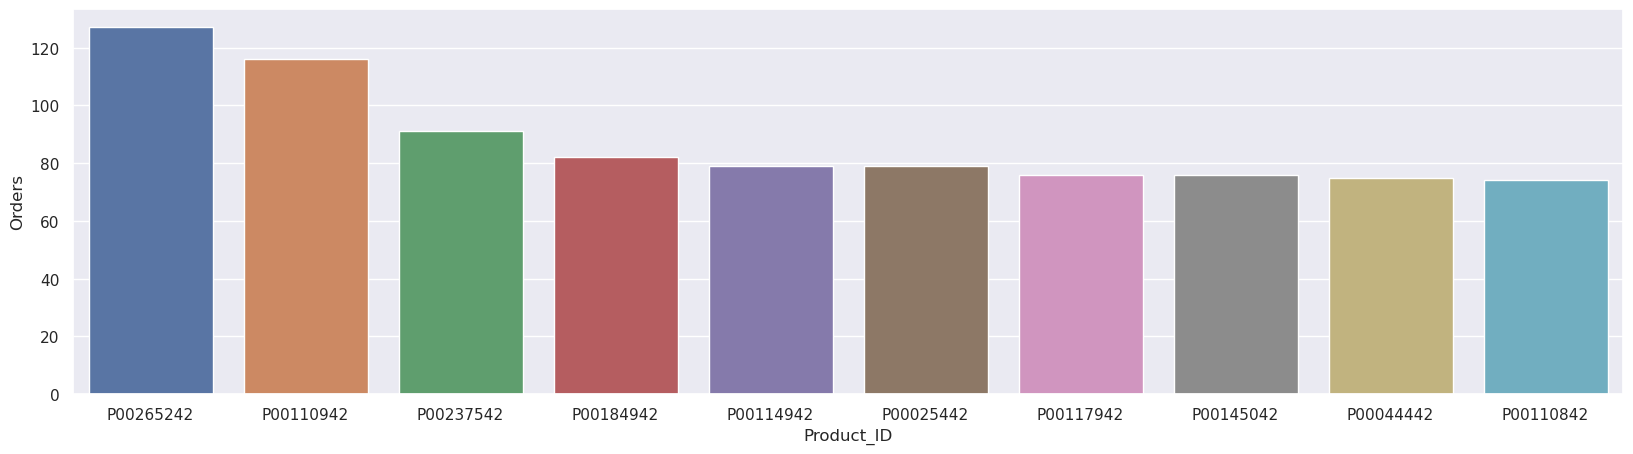

In [34]:
sales_pid = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_pid, x = 'Product_ID',y= 'Orders')

<Axes: xlabel='Product_ID'>

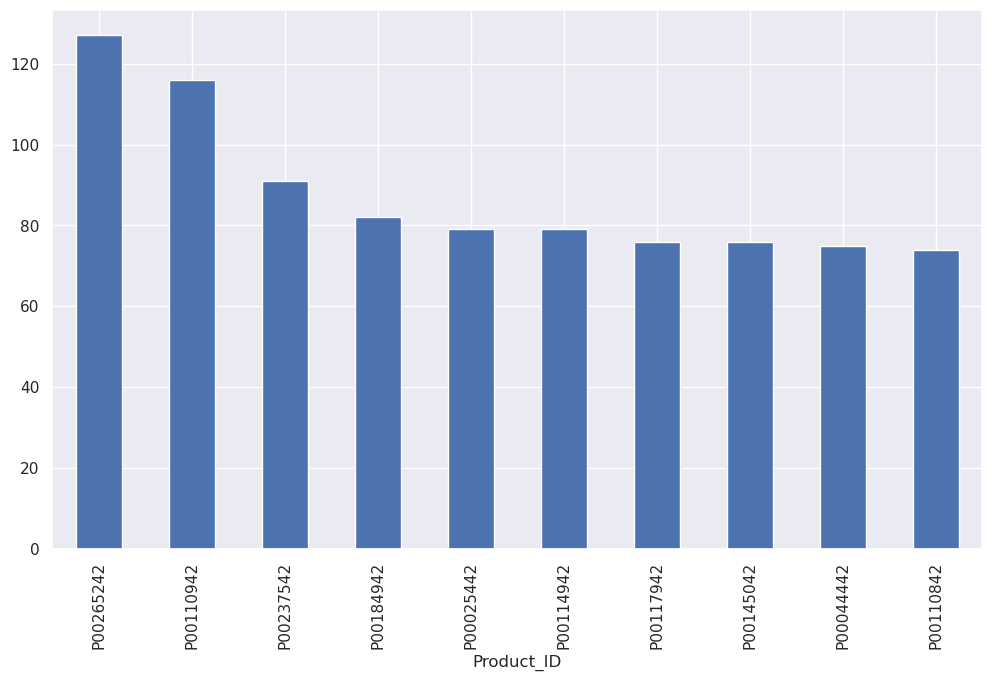

In [35]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

**CONCLUSION**

**Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category**